## ABC

In [1]:
import sys
import os

# Add the parent directory (sbi) to sys.path
sys.path.insert(0, os.path.abspath('..'))

# Now try importing your local sbi package
import sbi
import sbi.simulators
import numpy as np
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

#print("sbi package imported successfully")


2024-11-25 21:40:15.867 | INFO     | sbi.config:<module>:11 - PROJ_ROOT path is: C:\Users\Theodora\Documents\master2\sbi


In [11]:
np.random.seed(7)

In [12]:
linear_sim = sbi.simulators.LinearSimulator(sigma_noise=0.1)
uniform_prior = sbi.simulators.UniformPrior(-2, 2, dim=2)

In [13]:
x_obs = np.random.normal(size=(2,))
print(f"X fixed value is: {x_obs}")
y_obs = np.array(0.3)

X fixed value is: [ 1.6905257  -0.46593737]


In [14]:
import sbi.models.abc
abc_inference1 = sbi.models.abc.ABCInference(x=x_obs, obs=y_obs)
samples_pos1 = abc_inference1.infer_method1_numpy(target_samples=100, Nsamples=1000, simulator_func=linear_sim.simulate_numpy, prior=uniform_prior.sample_numpy)
abc_inference2 = sbi.models.abc.ABCInference(x=x_obs, obs=y_obs, eps = 0.01)
samples_pos2 = abc_inference2.infer_method2_numpy(target_samples=100, Nsamples=1000, batch_size=100, simulator_func=linear_sim.simulate_numpy, prior=uniform_prior.sample_numpy)


In [15]:
print (f" The number of posterior samples 1 is : {samples_pos1.shape[0]}\n")
print(f"The mean value of posterior 1 is : {samples_pos1.mean(axis=0)}\n")
print(f"The standard deviation of posterior 1 is : {samples_pos1.std(axis=0)}")

print("--"*50)
print(f"The number of posterior samples 2 is : {samples_pos2.shape[0]}\n")
print(f"The mean value of posterior 2 is : {samples_pos2.mean(axis=0)}\n")
print(f"The standard deviation of posterior 2 is : {samples_pos2.std(axis=0)}")

 The number of posterior samples 1 is : 100

The mean value of posterior 1 is : [0.36387706 0.12406343]

The standard deviation of posterior 1 is : [0.34651586 1.1724848 ]
----------------------------------------------------------------------------------------------------
The number of posterior samples 2 is : 100

The mean value of posterior 2 is : [ 0.16733134 -0.02259926]

The standard deviation of posterior 2 is : [0.299266  1.0737065]


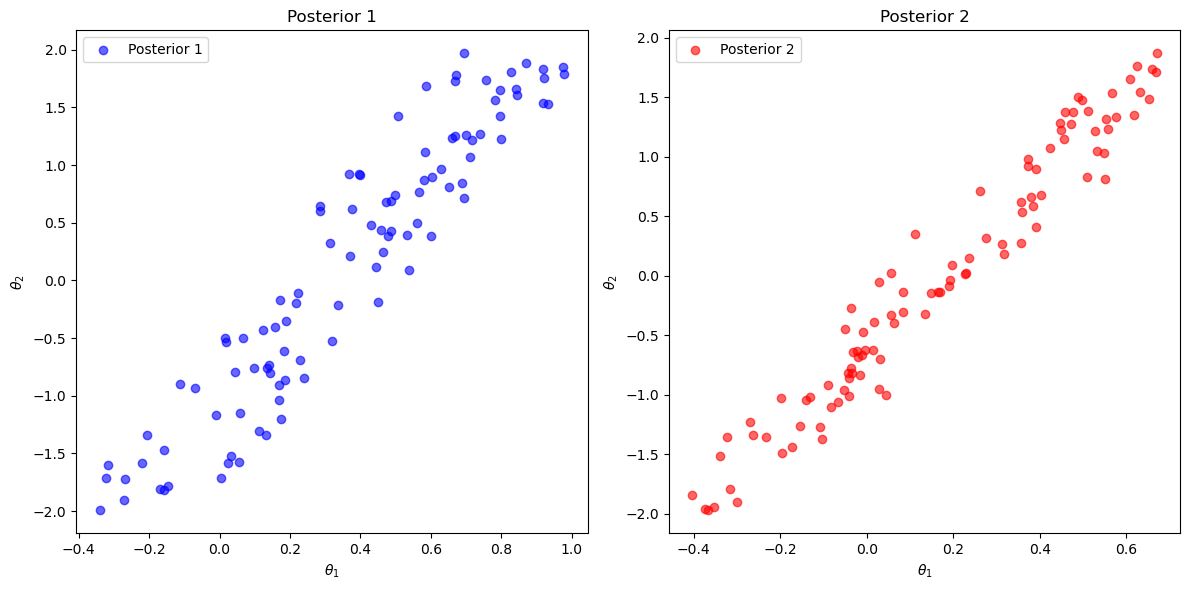

In [16]:
# Plot figures
import matplotlib.pyplot as plt

# Plot figures
fig, axes = plt.subplots(1,2, figsize=(12,6)) 

# Scatter plots for the posteriors from abc_methods
axes[0].scatter(samples_pos1[:,0], samples_pos1[:,1], alpha = 0.6, color='blue', label='Posterior 1')
axes[0].set_title('Posterior 1')
axes[0].set_xlabel(r"$\theta_1$")
axes[0].set_ylabel(r"$\theta_2$")
axes[0].legend()

axes[1].scatter(samples_pos2[:, 0], samples_pos2[:, 1], alpha = 0.6, color='red', label='Posterior 2')
axes[1].set_title('Posterior 2')
axes[1].set_xlabel(r"$\theta_1$")
axes[1].set_ylabel(r"$\theta_2$")
axes[1].legend()

plt.tight_layout()
plt.show()

In [17]:
key = random.PRNGKey(42)
samples_pos1_jax = abc_inference1.infer_method1_jax(target_samples=100, Nsamples=1000, simulator_func=linear_sim.simulate_jax, prior=uniform_prior.sample_jax, key=key)
samples_pos2_jax = abc_inference2.infer_method2_jax(target_samples=100, Nsamples=1000, batch_size=100, simulator_func = linear_sim.simulate_jax, prior=uniform_prior.sample_jax, key=key)


In [18]:
print (f" The number of posterior samples 1 is : {samples_pos1_jax.shape[0]}\n")
print(f"The mean value of posterior 1 is : {samples_pos1_jax.mean(axis=0)}\n")
print(f"The standard deviation of posterior 1 is : {samples_pos1_jax.std(axis=0)}")

print("--"*50)
print(f"The number of posterior samples 2 is : {samples_pos2_jax.shape[0]}\n")
print(f"The mean value of posterior 2 is : {samples_pos2_jax.mean(axis=0)}\n")
print(f"The standard deviation of posterior 2 is : {samples_pos2_jax.std(axis=0)}")

 The number of posterior samples 1 is : 100

The mean value of posterior 1 is : [0.20505913 0.12023385]

The standard deviation of posterior 1 is : [0.34101003 1.1676854 ]
----------------------------------------------------------------------------------------------------
The number of posterior samples 2 is : 100

The mean value of posterior 2 is : [ 0.13897572 -0.12871163]

The standard deviation of posterior 2 is : [0.3127559 1.1310267]


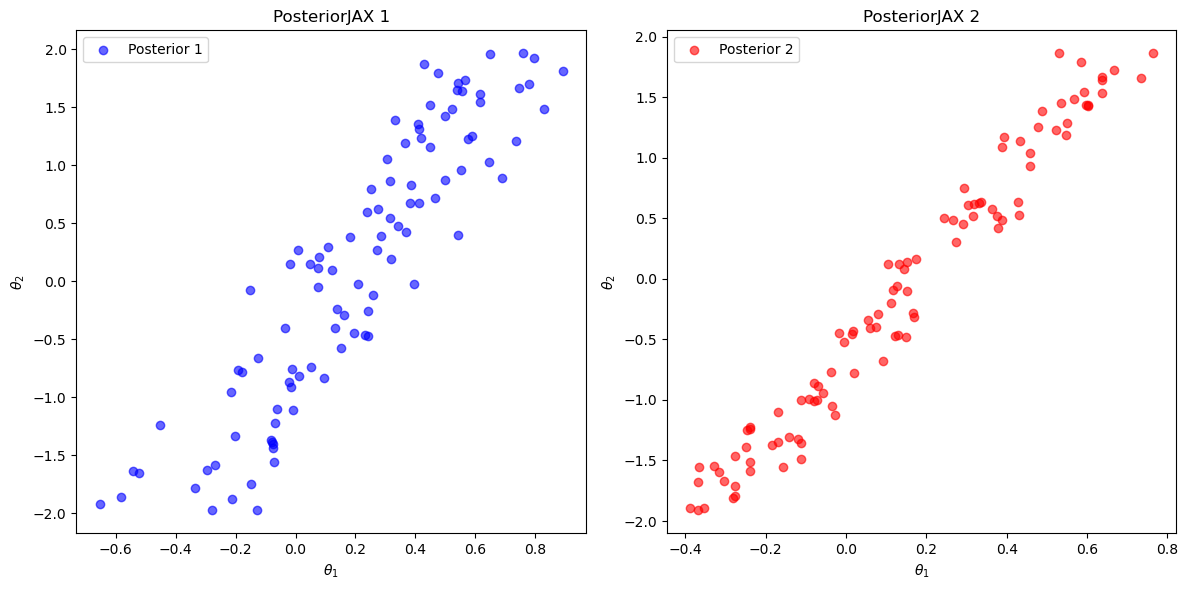

In [19]:
# Plot figures
import matplotlib.pyplot as plt

# Plot figures
fig, axes = plt.subplots(1,2, figsize=(12,6)) 

# Scatter plots for the posteriors from abc_methods
axes[0].scatter(samples_pos1_jax[:,0], samples_pos1_jax[:,1], alpha = 0.6, color='blue', label='Posterior 1')
axes[0].set_title('PosteriorJAX 1')
axes[0].set_xlabel(r"$\theta_1$")
axes[0].set_ylabel(r"$\theta_2$")
axes[0].legend()

axes[1].scatter(samples_pos2_jax[:, 0], samples_pos2_jax[:, 1], alpha = 0.6, color='red', label='Posterior 2')
axes[1].set_title('PosteriorJAX 2')
axes[1].set_xlabel(r"$\theta_1$")
axes[1].set_ylabel(r"$\theta_2$")
axes[1].legend()

plt.tight_layout()
plt.show()


## OMC

In [15]:
import numpy as np
from sbi.simulators import prior, simulator_omc
from sbi.models.omc import OMCInference

ModuleNotFoundError: No module named 'simulators'

In [4]:
# Define the dimensions and number of samples
N=10000
theta_dim, u_dim = 5, 5 # Dimensions of theta, # Dimension of nuisance variables

# Observation
y_obs = np.full(theta_dim, 0.3) # Assuming y has the same dimension as simulator output
np.random.seed(42)

# Fixed x from a uniform distribution
x_fixed = np.random.uniform(-1,1, theta_dim)

# Sampling thetas from the prior
theta_pr = prior(N, theta_dim)

# Run Inference 
omc_inference = OMCInference(theta_pr, y_obs, x_fixed, u_dim)
samples_pos, weights = omc_inference.infer()
print(f"The number of samples is: {samples_pos.shape[0]}")

# Calculate weighted mean and std for each dimnensioin of theta
weighted_mean = np.average(samples_pos, weights = weights, axis=0)
weighted_variance = np.average((samples_pos - weighted_mean)**2, weights = weights, axis=0)
weighted_std = np.sqrt(weighted_variance)

print(f"The mean value of the posterior distribution is: {weighted_mean}")
print(f"The standard deviation of the posterior distribution is: {weighted_std}")

The number of samples is: 10000
The mean value of the posterior distribution is: [ 0.00538229 -0.02723251 -0.00138771  0.01190336 -0.01144511]
The standard deviation of the posterior distribution is: [1.15842172 1.15358599 1.15297844 1.15212796 1.15044569]


In [5]:
weights.shape

(10000,)

In [7]:
y_obs

array([0.3, 0.3, 0.3, 0.3, 0.3])

In [9]:
theta_pr.shape

(10000, 5)

In [10]:
non_zero_mask = weights>0
filtered_samples = samples_pos[non_zero_mask]
filtered_weights = weights[non_zero_mask]
print(f"The number of the non-negative samples are: {filtered_samples.shape}")

The number of the non-negative samples are: (10000, 5)
